## Do Trump's Tweets Really Affect Stock Prices?
Joanna Rashid 

Last Updated: 12/13/19

Donald Trump’s Twitter feed generates lots of publicity. Much is written about Trump's ability to alter a company's stock price by Tweeting about it. Do Trump's Tweets really affect stock prices? This data visualization project will delve into @TheRealDonaldTrump’s Tweets of 2019 to date and contrast them against the stock prices of six publically held companies that Trump tweeted most about. 

## Press on Trump Tweets and the Market

Think a Negative Tweet From Trump Crushes a Stock? Think Again, Wall Street Journal
https://www.wsj.com/graphics/trump-market-tweets/

Amazon and 16 other companies Trump has attacked since his election, CNN Money
https://money.cnn.com/2018/04/04/news/companies/trump-companies-attacks/index.html

62 businesses Trump has targeted on Twitter
https://finance.yahoo.com/news/61-businesses-trump-has-attacked-on-twitter-181623705.html

Here’s What a Trump Tweet Does to a Company’s Share Price
https://fortune.com/2017/02/24/trump-tweet-stocks/

In [1]:
# Library for dataframes
import pandas as pd

# Libraries for plotting
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Sources

Donald Trump's twitter feed Jan 1, 2019 through December 8, 2019.
http://www.trumptwitterarchive.com/archive

Fortune 500 companies with ticker symbols.
https://data.world/databeats/2016-fortune-500-list-with-ticker-symbols/workspace/file?filename=Fortune500.csv

Yahoo Finance Historical Stock Data
https://finance.yahoo.com/lookup

## Dataframes

In [2]:
#All trump tweets from 01/01/2019 through 12/08/2019
trump_df = pd.read_csv('trump_tweets.csv')
trump_df['date'] = pd.to_datetime(trump_df.date)

#Historical daily stock prices from 01/01/2019 through 12/08/2019 
#for most tweeted companies
apple_df = pd.read_csv('AAPL.csv')
apple_df['Date'] = pd.to_datetime(apple_df.Date)

nyt_df = pd.read_csv('NYT.csv')
nyt_df['Date'] = pd.to_datetime(nyt_df.Date)

comcast_df = pd.read_csv('CMCSA.csv')
comcast_df['Date'] = pd.to_datetime(comcast_df.Date)

ford_df = pd.read_csv('F.csv')
ford_df['Date'] = pd.to_datetime(ford_df.Date)

facebook_df = pd.read_csv('FB.csv')
facebook_df['Date'] = pd.to_datetime(facebook_df.Date)

lockheed_df = pd.read_csv('LMT.csv')
lockheed_df['Date'] = pd.to_datetime(lockheed_df.Date)

lockheed_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,258.359985,265.299988,256.790009,264.730011,258.070404,1064700
1,2019-01-03,262.320007,264.000000,257.380005,258.079987,251.587662,1165600
2,2019-01-04,261.920013,265.489990,260.339996,265.040009,258.372620,1443800
3,2019-01-07,266.000000,270.000000,263.859985,268.079987,261.336090,1465200
4,2019-01-08,271.130005,271.750000,267.809998,269.869995,263.081085,1791400


In [3]:
def count_tweets(company1, company2):
    """This function takes in two strings, company name and some other string, 
    such as CEO name, and searches the 'tweet' column for matches. The matches make 
    a new data frame that is returned and the number of rows, which is the same as
    the number of tweets, is stored as a value in a dictionary which acts as a 
    frequency table."""
    
    result_df = trump_df[trump_df['tweet'].str.contains(company1, company2) == True]
    counter_dict[company1] = len(result_df.tweet)
    
def show_tweets(company1, company2):
    """This function takes in two strings, company name and some other string, 
    such as CEO name, and searches the 'tweet' column for matches. The matches make 
    a new data frame that is returned."""
    
    result_df = trump_df[trump_df['tweet'].str.contains(company1, company2) == True]
    return result_df
    
    
def tweet_stock(co, ceo, stock_df):
    """Searches trump tweet data frame for two strings and returns new data frame 
    with tweets limited to those containing one or both strings.  Converts those 
    dates into a list. Plots a line graph of daily stock closing prices form a 
    stock price dataframe. Adds a vertical line marker at the date of any trump 
    tweet about the company."""
    
    result_df = trump_df[trump_df['tweet'].str.contains(co, ceo) == True]
    date_list = result_df.date.tolist()
    
    fig = plt.figure
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set(title='Daily Stock Closing Price 2019 (Vertical Lines = Tweet Date)',
       ylabel='Stock Price')
    ax.plot(stock_df.Date, stock_df.Close)
    for date in date_list:
        plt.axvline(x = date)
    
    plt.show()
    return fig

In [4]:
#searches all tweets for below companies while 
#compling count dictionary
counter_dict = {}

company1 = 'apple'
company2 = 'time cook'
count_tweets(company1, company2)

company1 = 'nbc'
company2 = 'cnbc'
count_tweets(company1, company2)

company1 = 'amazon'
company2 = 'jeff bezos'
count_tweets(company1, company2)

company1 = 'cnn'
company2 = ''
count_tweets(company1, company2)

company1 = 'ford'
company2 = ''
count_tweets(company1, company2)

company1 = 'facebook'
company2 = 'zuckerberg'
count_tweets(company1, company2)

company1 = 'cbs'
company2 = ''
count_tweets(company1, company2)

company1 = 'boeing'
company2 = ''
count_tweets(company1, company2)

company1 = 'toyota'
company2 = ''
count_tweets(company1, company2)

company1 = 'lockheed'
company2 = 'hewson'
count_tweets(company1, company2)

company1 = 'boeing'
company2 = ''
count_tweets(company1, company2)

company1 = 'abc news'
company2 = ''
count_tweets(company1, company2)

company1 = 'fox news'
company2 = 'fox'
count_tweets(company1, company2)

#stores the dictionare to a list
count = counter_dict
count_df = pd.DataFrame(list(count.items()), columns = ['Company', 'Tweets'])
count_df_sort = count_df.sort_values(by = 'Tweets', ascending = False)

count_df_sort.head()

,Company,Tweets
3,cnn,85
1,nbc,62
2,amazon,16
4,ford,15
11,fox news,13


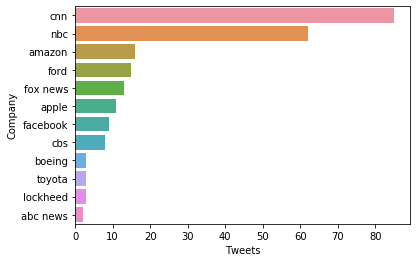

In [63]:
#barplot
tweet_co = sns.barplot(x = count_df_sort.Tweets, 
                       y = count_df_sort.Company)
fig = tweet_co.get_figure()
fig.savefig('tweet_co.png', bbox_inches = 'tight')

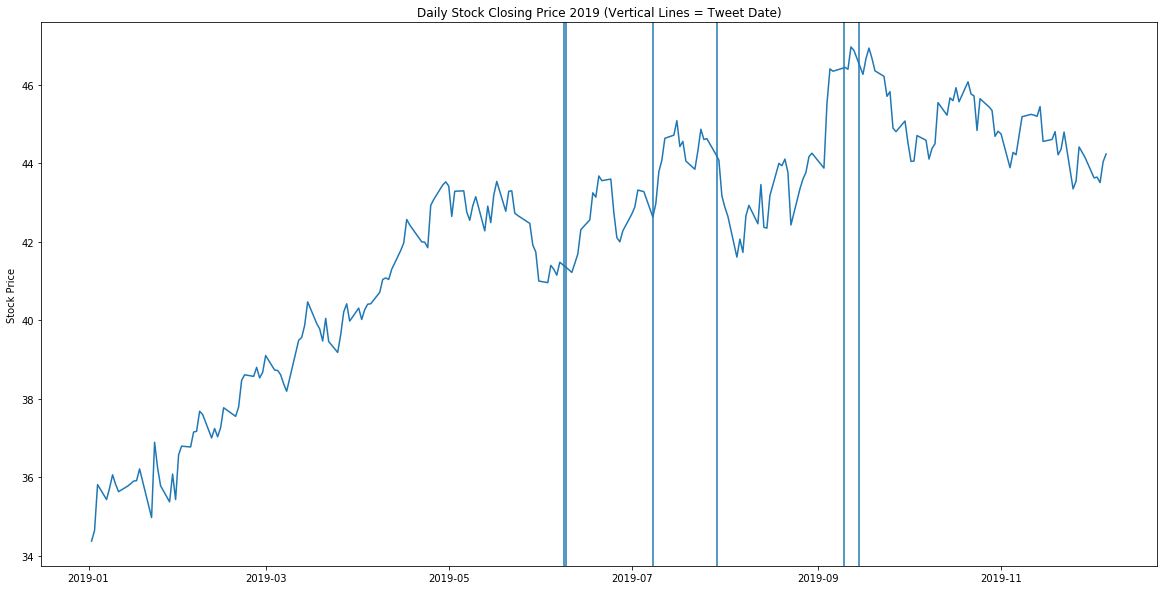

In [33]:
co = 'comcast'
ceo = 'comcast'
data = comcast_df

comcast_plot = tweet_stock(co, ceo, data)
comcast_plot.savefig('comcast_plot.png')

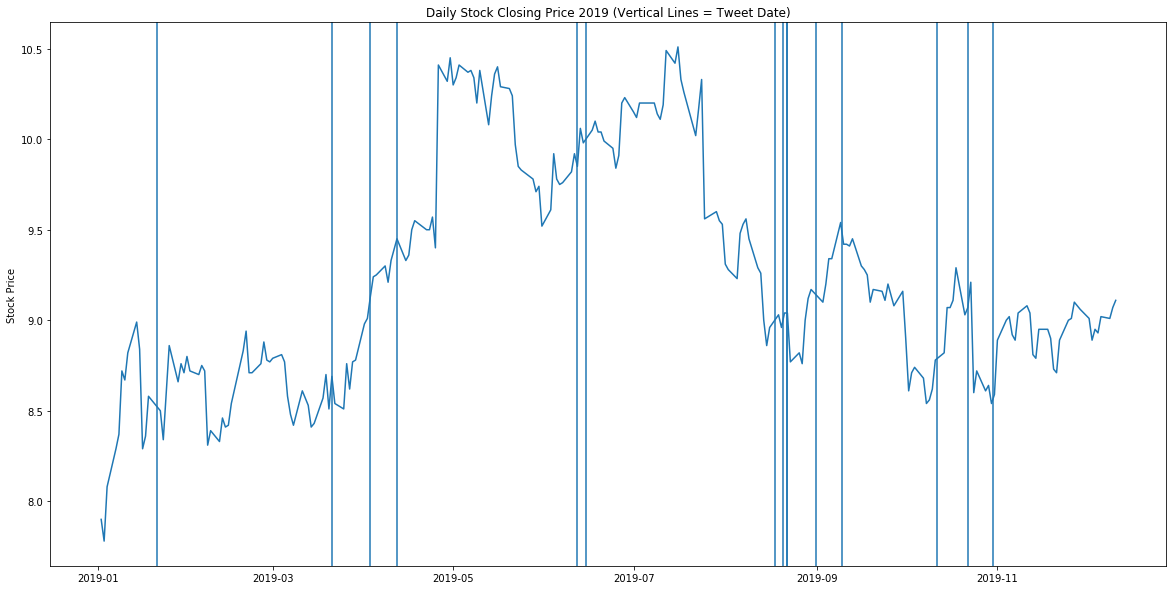

In [35]:
co = 'ford'
ceo = 'ford'
data = ford_df

ford_plot = tweet_stock(co, ceo, data)
ford_plot.savefig('ford_plot.png')

In [66]:
show_tweets('ford','')

,tweet_raw,tweet,date,tweet_id
1119,__Our Country cannot afford for the Democrats ...,__our country cannot afford for the democrats ...,2019-10-30 14:51:00,1.190000e+18
1376,RT @RepRickCrawford: Adam Schiff has eliminate...,rt @reprickcrawford: adam schiff has eliminate...,2019-10-22 00:41:00,1.190000e+18
1689,RT @IvankaTrump: We are striving to ensure all...,rt @ivankatrump: we are striving to ensure all...,2019-10-11 15:42:00,1.180000e+18
2666,When the former Governor of the Great State of...,when the former governor of the great state of...,2019-09-09 10:58:00,1.170000e+18
2923,RT @SenatorLankford: As I travel around the st...,rt @senatorlankford: as i travel around the st...,2019-08-31 12:06:00,1.170000e+18
3165,Henry Ford would be very disappointed if he sa...,henry ford would be very disappointed if he sa...,2019-08-21 23:01:00,1.160000e+18
3166,The Legendary Henry Ford and Alfred P. Sloan t...,the legendary henry ford and alfred p. sloan t...,2019-08-21 22:50:00,1.160000e+18
3212,RT @VP: Under @POTUS__ leadership the auto in...,rt @vp: under @potus__ leadership the auto in...,2019-08-20 13:16:00,1.160000e+18
3264,RT @thebradfordfile: America --Get ready for a...,rt @thebradfordfile: america --get ready for a...,2019-08-17 22:02:00,1.160000e+18
4515,Announcing great expanded HRAs__big win for sm...,announcing great expanded hras__big win for sm...,2019-06-14 19:14:00,1.140000e+18


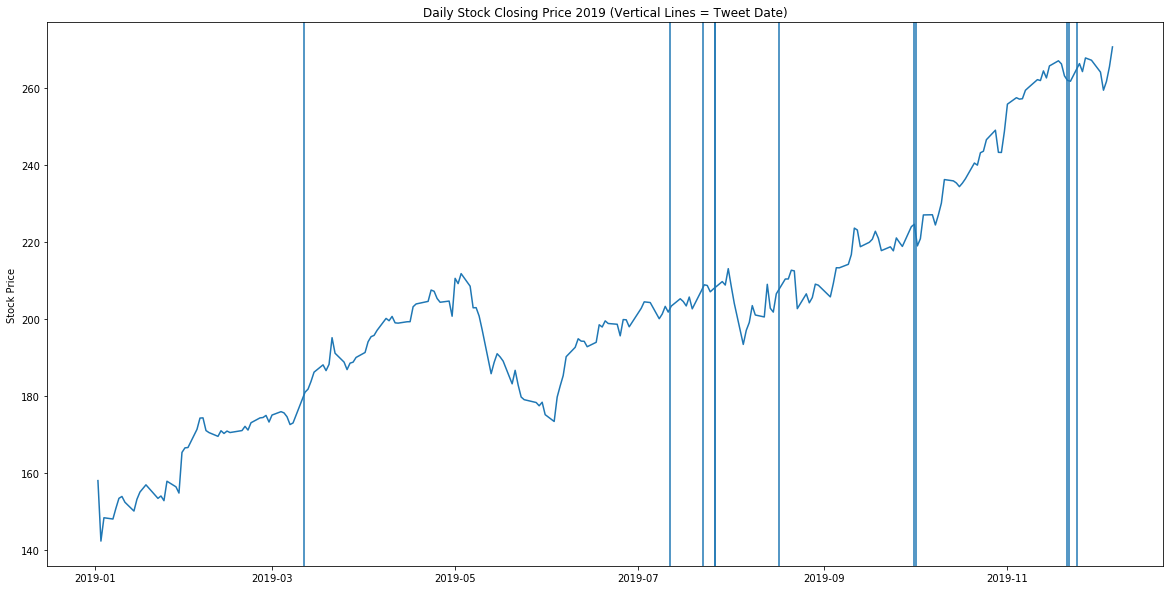

In [36]:
co = 'apple'
ceo = 'tim cook'
data = apple_df

apple_plot = tweet_stock(co, ceo, data)
apple_plot.savefig('apple_plot.png')

In [67]:
show_tweets('apple','tim cook')

,tweet_raw,tweet,date,tweet_id
331,Pushed hard to have Apple build in USA! ://t.c...,pushed hard to have apple build in usa! ://t.c...,2019-11-24 04:53:00,1.200000e+18
408,During my visit yesterday to Austin Texas for ...,during my visit yesterday to austin texas for ...,2019-11-21 12:31:00,1.200000e+18
418,Today I opened a major Apple Manufacturing pla...,today i opened a major apple manufacturing pla...,2019-11-20 23:18:00,1.200000e+18
2084,RT @realDonaldTrump: Great news! @Apple announ...,rt @realdonaldtrump: great news! @apple announ...,2019-10-01 10:07:00,1.180000e+18
2095,Great news! @Apple announced that it is buildi...,great news! @apple announced that it is buildi...,2019-09-30 19:04:00,1.180000e+18
3289,Having dinner tonight with Tim Cook of Apple. ...,having dinner tonight with tim cook of apple. ...,2019-08-16 23:04:00,1.160000e+18
3691,Apple will not be given Tariff waiver or relie...,apple will not be given tariff waiver or relie...,2019-07-26 15:25:00,1.150000e+18
3693,Apple will not be given Tariff wavers or relie...,apple will not be given tariff wavers or relie...,2019-07-26 14:08:00,1.150000e+18
3788,Highly conflicted Robert Mueller should not be...,highly conflicted robert mueller should not be...,2019-07-22 12:53:00,1.150000e+18
4061,Now the Democrats have asked to see 12 more pe...,now the democrats have asked to see 12 more pe...,2019-07-11 14:00:00,1.150000e+18


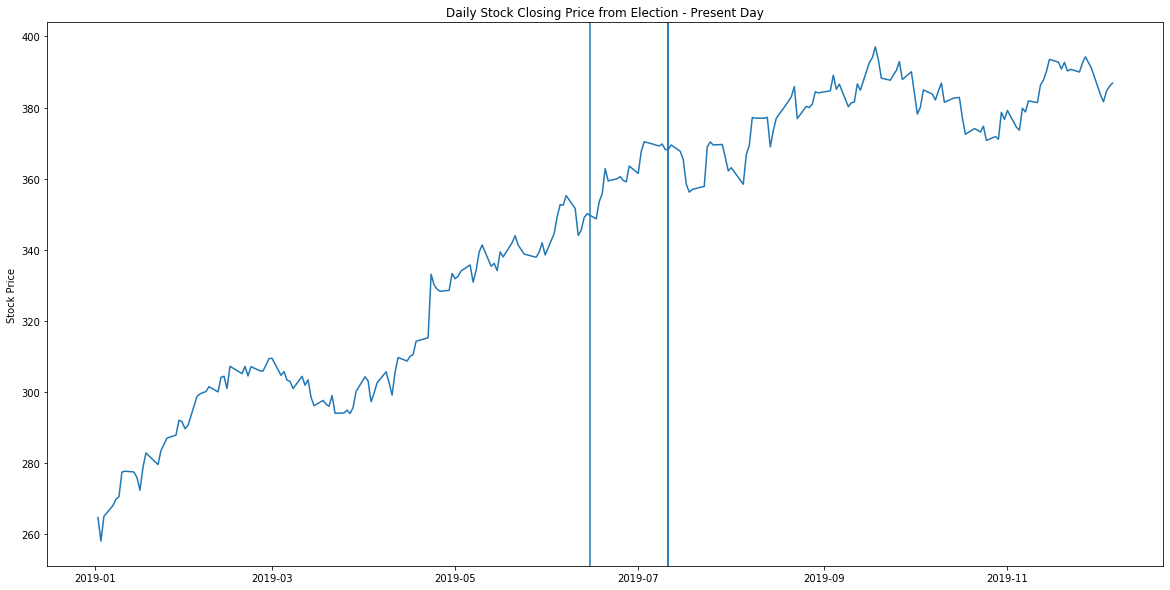

In [30]:
co = 'lockheed'
ceo = 'hewson'
data = lockheed_df

lockheed_plot = tweet_stock(co, ceo, data)
lockheed_plot.savefig('lockheed_plot.png')

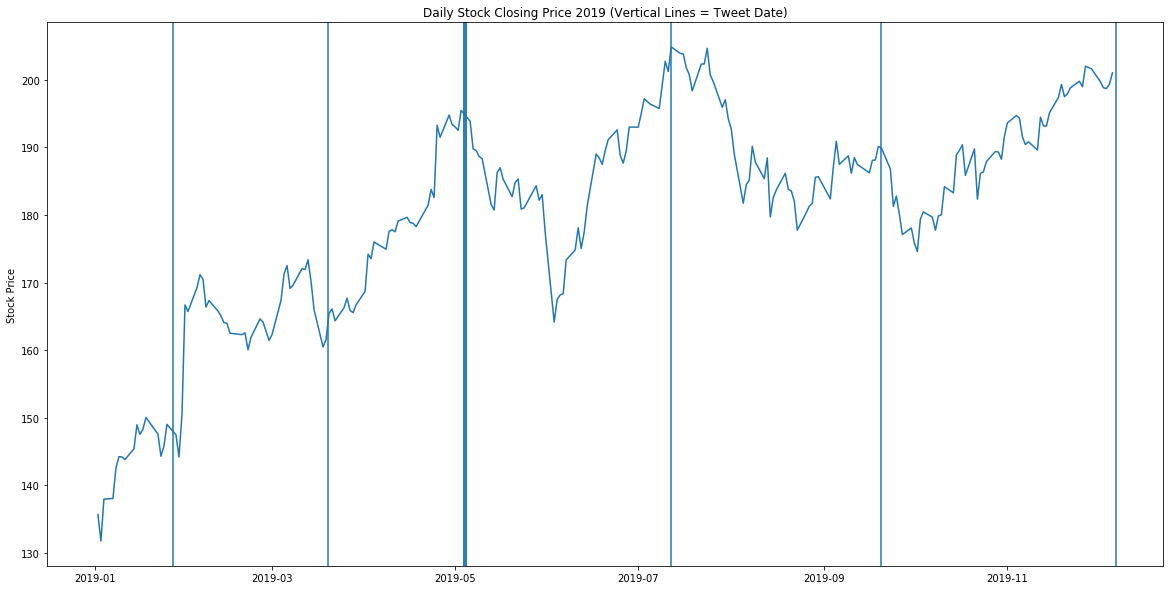

In [37]:
co = 'facebook'
ceo = 'zuckerberg'
data = facebook_df

fb_plot = tweet_stock(co, ceo, data)
fb_plot.savefig('facebook_plot.png')

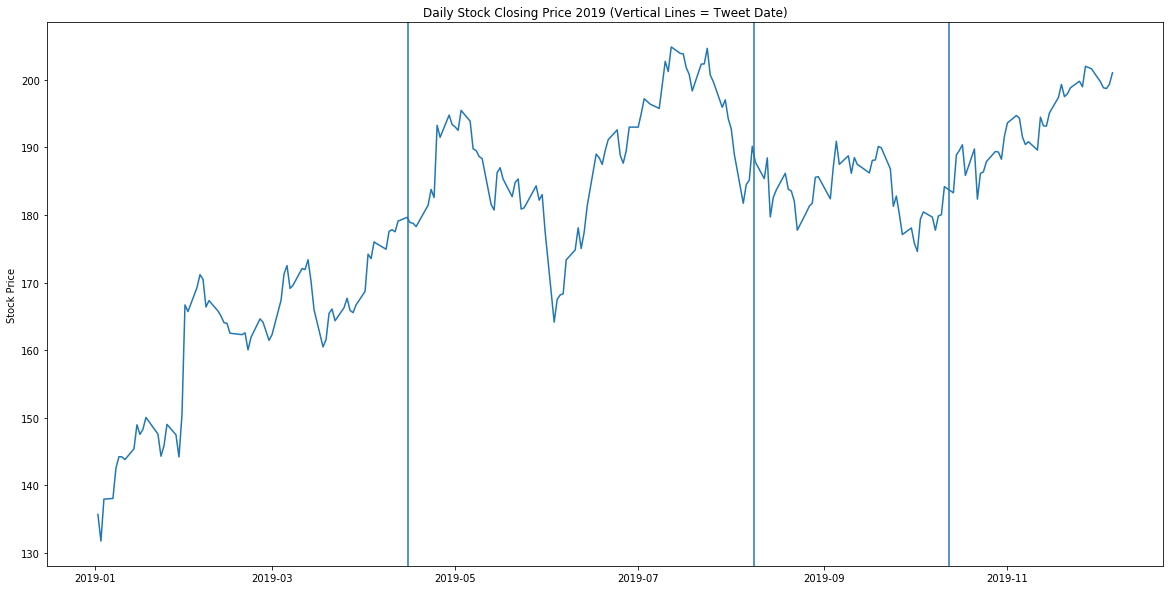

In [39]:
co = 'boeing'
ceo = 'boeing'
data = facebook_df

boeing_plot = tweet_stock(co, ceo, data)
boeing_plot.savefig('boeing_plot.png')

These are some other functions I wrote because I was planning to iterate through all trump tweets and check them against list of Fortune 500 companies I had made both a list and datframe for.  I was going to do this in order to get a frequency dictionary of the companies tweeted about.  It turned out that there were far to many "flaws" in the data perform this.  I went in another direction obtaining another data set with company names and tweet frequencies already computed.

In [40]:
def cross_ref(sub_list, ref_list, cross_list):
    """This function iterates through a list and checks if the string 
    is in a reference list.  If it is, the word is added to a new list 
    called cross_list"""
    for item in sub_list:
        if item in ref_list:
            cross_list.append(item)

def cross_ref_2(sub_string, string, cross_dict):
    str = sub_string
    cross_dict = {}
    if (str in string) == True:
        if str not in cross_dict:
            cross_dict[str] = 1
        else:
            cross_dict[str] += 1
    return cross_dict

def freq_dict(string):
    """It takes a string of lyrics as input and returns a dictionary as output, 
    such that the dictionary contains key-value pairs in the form 
    of words and their respective counts."""
    ls = string.split()
    freq_dict = {}
    for word in ls:
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1
    return freq_dict
